In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

In [77]:
df = pd.read_csv("student-por.csv", delimiter = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [78]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

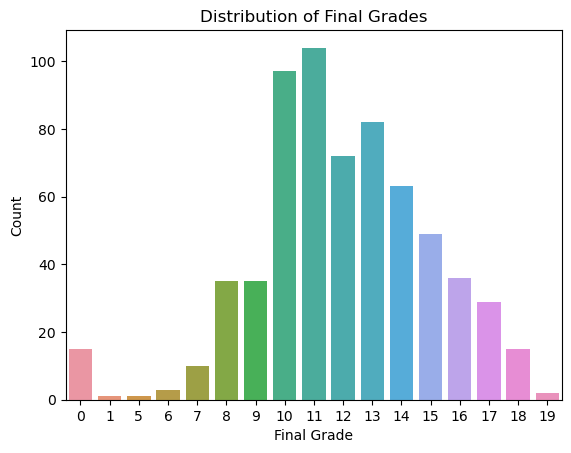

In [79]:
#Figuring Out the number of labels
sns.countplot(data = df, x="G3")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Distribution of Final Grades")
plt.show()

In [80]:
df['G3'].value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

In [81]:
df['G3'].value_counts().sort_index(ascending=False)

G3
19      2
18     15
17     29
16     36
15     49
14     63
13     82
12     72
11    104
10     97
9      35
8      35
7      10
6       3
5       1
1       1
0      15
Name: count, dtype: int64

In [82]:
#결측치 여부 확이 (전처리 주요 과정 中 1)
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
644   False  False  False    False    False    False  False  False  False   
645   False  False  False    False    False    False  False  False  False   
646   False  False  False    False    False    False  False  False  False   
647   False  False  False    False    False    False  False  False  False   
648   False  False  False    False    False    False  False  False  False   

      Fjob  .

In [83]:
df = df.dropna()
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

C:\Users\whdng\AppData\Local\Temp\ipykernel_21456\4134045377.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['G1'], kde=True, hist=False, ax=ax1)


Text(0.5, 1.0, 'Distribution of G1 Grades')

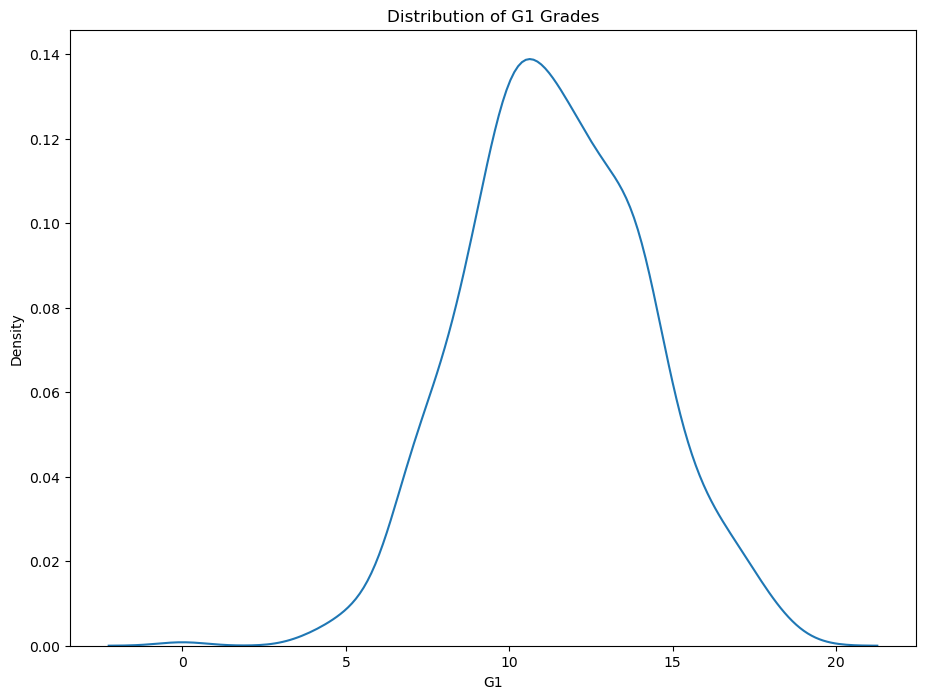

In [84]:
figure = plt.figure(figsize=(24,8))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['G1'], kde=True, hist=False, ax=ax1)
ax1.set_title('Distribution of G1 Grades')



C:\Users\whdng\AppData\Local\Temp\ipykernel_21456\3417290740.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['G2'], kde=True, hist=False, ax=ax2)


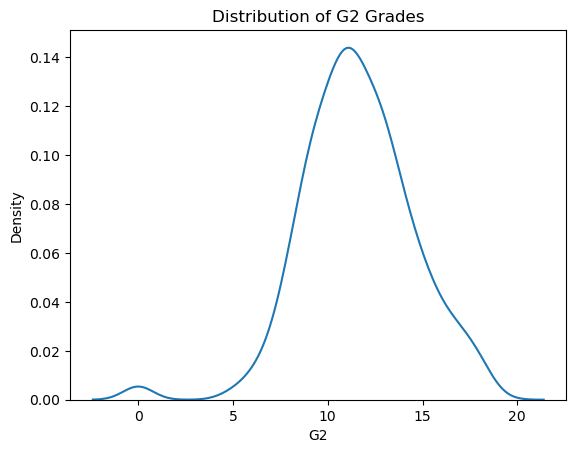

In [85]:
ax2 = plt.subplot()
sns.distplot(df['G2'], kde=True, hist=False, ax=ax2)
ax2.set_title('Distribution of G2 Grades')

plt.show()

C:\Users\whdng\AppData\Local\Temp\ipykernel_21456\3695987057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['G3'], kde=True, hist=False, ax=ax3)


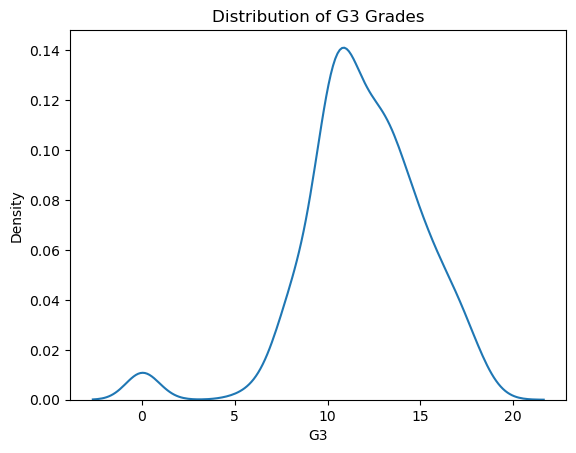

In [86]:
ax3 = plt.subplot()
sns.distplot(df['G3'], kde=True, hist=False, ax=ax3)
ax3.set_title('Distribution of G3 Grades')

plt.show()

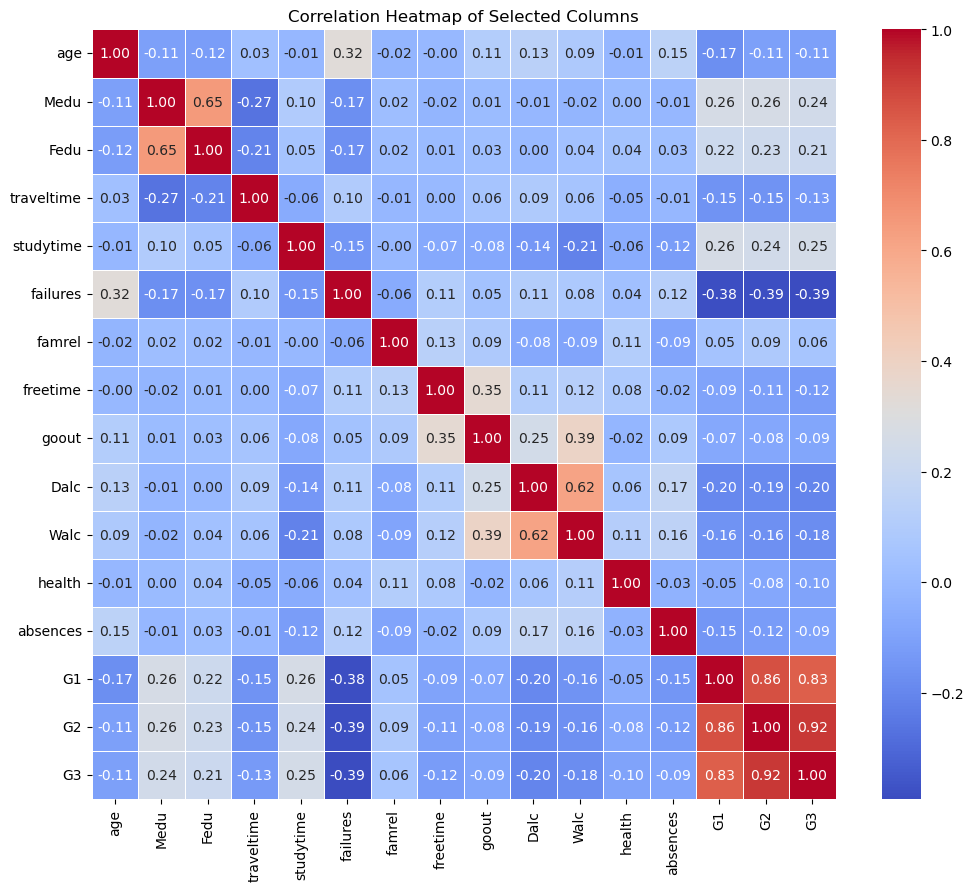

In [87]:
# 선택할 열들을 리스트로 저장합니다.
selected_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                    'absences', 'G1', 'G2', 'G3']

# 선택한 열들에 대한 상관관계를 계산합니다.
correlation = df[selected_columns].corr()

# 상관관계 히트맵을 시각화합니다.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()
#G3는 G2, G1 외 다른 컬럼과는 큰 연관관계가 있어보이진 않는다. 

In [115]:
print(df.dtypes)


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [257]:
# 데이터프레임에서 정수 데이터 타입이 아닌 열을 선택
non_int_columns = df.select_dtypes(exclude=['int64']).columns

# 추가로 제외할 열의 리스트를 생성
additional_columns_to_exclude = ['age', 'traveltime', 'famrel', 'health' , 
                                 'absences', 'goout','Dalc','Walc', 'Medu', 'Fedu', 'freetime', 'failures', 'studytime']

# 정수 데이터 타입이 아닌 열과 추가로 제외할 열을 모두 제외
columns_to_exclude = non_int_columns.tolist() + additional_columns_to_exclude
X = df.drop(columns_to_exclude, axis=1)

# 수정된 데이터프레임 출력
X.head()


,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [258]:
X.columns

Index(['G1', 'G2', 'G3'], dtype='object')

In [259]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [260]:
X

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13
...,...,...,...
644,10,11,10
645,15,15,16
646,11,12,9
647,10,10,10


In [261]:
y=df['G3']
y.value_counts()

G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

In [262]:
y=df['G3']
y.value_counts().sort_index(ascending=False)

G3
19      2
18     15
17     29
16     36
15     49
14     63
13     82
12     72
11    104
10     97
9      35
8      35
7      10
6       3
5       1
1       1
0      15
Name: count, dtype: int64

C:\Users\whdng\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


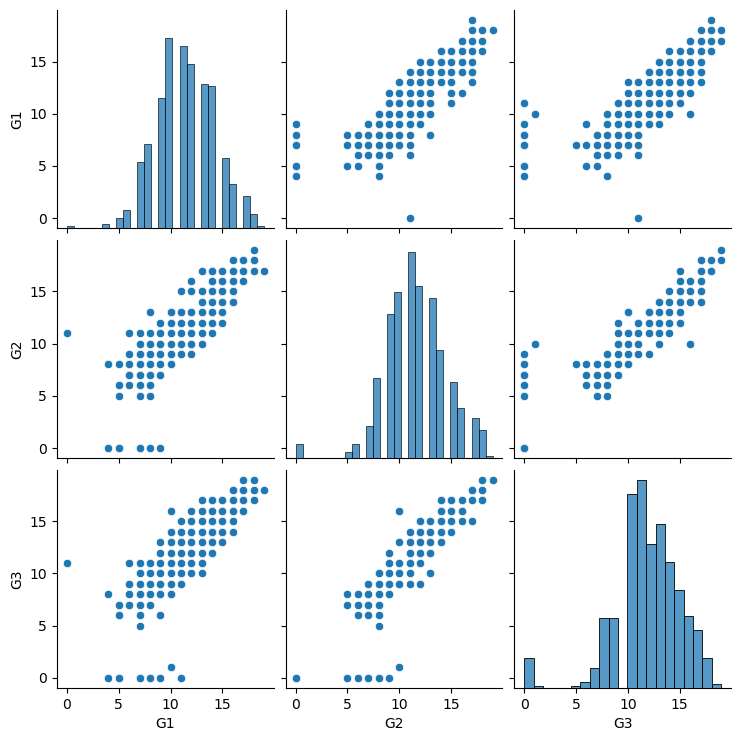

In [263]:
selected_columns = [ 'G1', 'G2', 'G3']

sns.pairplot(df[selected_columns])
plt.show()

In [264]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [265]:
#훈련 세트와 테스트 세트 배분
#문제 데이터와 Target(정답) 데이터 각각 훈련 세트와 테스트 세트로 나눌 것!


In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.21, random_state=0)

In [267]:
X.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [268]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [274]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9562043795620438
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  5  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1]]


In [278]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.32116788321167883
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  5 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 17  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  1  4  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  2 14  6  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  4  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  2  1  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  1  1  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]]


C:\Users\whdng\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [279]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.45985401459854014
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  3  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 16  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  6  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  8  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  5  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0]]


C:\Users\whdng\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [281]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

 #뭔가 이상하다. 옳지 않다.


--- Decision Tree Classifier ---
1.0
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2]]


In [282]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.948905109489051
[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 18  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 21  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2]]


In [ ]:
#데이터에 따라서 적합한 분류 모델이 다름을 추론할 수 있다. 